In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, Activation, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Image Colourization/CIFAR100'
train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(32, 32), batch_size=100, class_mode=None)


Found 44888 images belonging to 100 classes.


In [ ]:
X =[]
Y =[]
for a in range(100):
  for img in train[a]:
        lab = rgb2lab(img)
        X.append(lab[:,:,0]) 
        Y.append(lab[:,:,1:] / 128 ) 
  print('Completed ' + str(a+1) + ' Iteration')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

Completed 1 Iteration
Completed 2 Iteration
Completed 3 Iteration
Completed 4 Iteration
Completed 5 Iteration
Completed 6 Iteration
Completed 7 Iteration
Completed 8 Iteration
Completed 9 Iteration
Completed 10 Iteration
Completed 11 Iteration
Completed 12 Iteration
Completed 13 Iteration
Completed 14 Iteration
Completed 15 Iteration
Completed 16 Iteration
Completed 17 Iteration
Completed 18 Iteration
Completed 19 Iteration
Completed 20 Iteration
Completed 21 Iteration
Completed 22 Iteration
Completed 23 Iteration
Completed 24 Iteration
Completed 25 Iteration
Completed 26 Iteration
Completed 27 Iteration
Completed 28 Iteration
Completed 29 Iteration
Completed 30 Iteration
Completed 31 Iteration
Completed 32 Iteration
Completed 33 Iteration
Completed 34 Iteration
Completed 35 Iteration
Completed 36 Iteration
Completed 37 Iteration
Completed 38 Iteration
Completed 39 Iteration
Completed 40 Iteration
Completed 41 Iteration
Completed 42 Iteration
Completed 43 Iteration
Completed 44 Iterati

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile( loss='mse' , metrics=['accuracy'])

Epoch 1/200
180/180 [==============================] - 4s 16ms/step - loss: 0.0150 - accuracy: 0.6565 - val_loss: 0.0141 - val_accuracy: 0.6413
Epoch 2/200
180/180 [==============================] - 3s 15ms/step - loss: 0.0147 - accuracy: 0.6559 - val_loss: 0.0137 - val_accuracy: 0.6444
Epoch 3/200
180/180 [==============================] - 3s 15ms/step - loss: 0.0145 - accuracy: 0.6579 - val_loss: 0.0134 - val_accuracy: 0.6522
Epoch 4/200
180/180 [==============================] - 3s 15ms/step - loss: 0.0141 - accuracy: 0.6634 - val_loss: 0.0131 - val_accuracy: 0.6503
Epoch 5/200
180/180 [==============================] - 3s 16ms/step - loss: 0.0138 - accuracy: 0.6654 - val_loss: 0.0131 - val_accuracy: 0.6493
Epoch 6/200
180/180 [==============================] - 3s 16ms/step - loss: 0.0135 - accuracy: 0.6684 - val_loss: 0.0138 - val_accuracy: 0.6540
Epoch 7/200
180/180 [==============================] - 3s 16ms/step - loss: 0.0130 - accuracy: 0.6715 - val_loss: 0.0131 - val_accuracy:

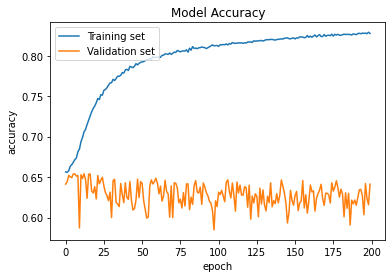

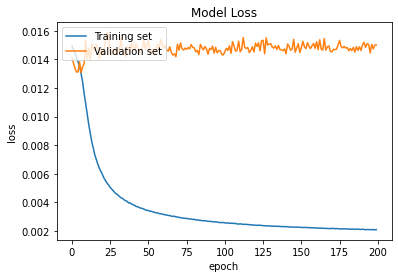

In [ ]:
history = model.fit(X,Y,validation_split=0.1, epochs=200, batch_size=50, shuffle=True)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer5(Multiclass)')

In [7]:
model = keras.models.load_model('/content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer5(Multiclass)')

In [9]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(32,32))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((32, 32, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  count = 2
  
  for i in range(count):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      plt.imshow(images[i])
  
  plt.show()

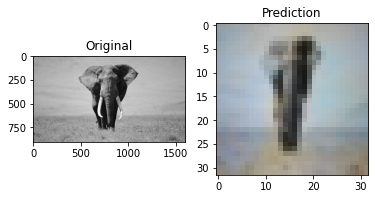

In [ ]:
predict('/content/Test-images/Test-Image1.jpg')

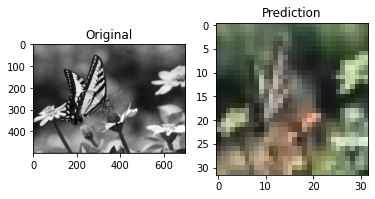

In [ ]:
predict('/content/Test-images/Test-Image2.jpg')

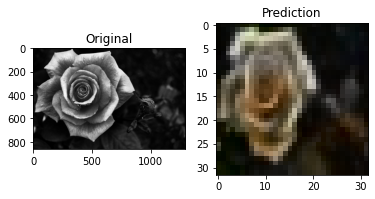

In [ ]:
predict('/content/Test-images/Test-Image3.jpg')

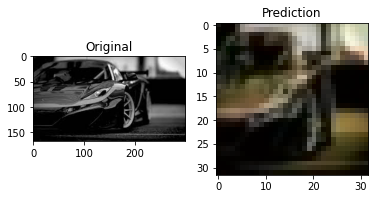

In [ ]:
predict('/content/Test-images/tEST-iMAGE5.jpg')